In [1]:
%matplotlib notebook

In [3]:
# import some shiz
import pandas as pd
# from data_preprocessing import BOC_init
import data_preprocessing
import pca
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# gameplan: run PCA on the mean sweep response to plot it in 3d, color coded by stimulus.

print(data_preprocessing.__file__)

boc,speciments_with_selectivity_S,_ = data_preprocessing.BOC_init()


data_preprocessing/__init__.pyc


In [5]:
expt_container_id = 511510855
cell_specimen_id = 517510587

session_id,session_data = data_preprocessing.get_session_id(expt_container_id,'B',boc)

response, mean_sweep_response, sweep_response, exp_container_id, session_id, session_data, stim_table_ns = data_preprocessing.open_h5_file(cell_specimen_id,'/Volumes/Brain2016','B')


In [6]:
response.shape
# 1st index: image, 2nd index : cell
# last index: 0 mean, 1 std deviation, 2 p value

(119, 244, 3)

### Looking at population mean sweep response

In [14]:
mean_stimulus_response = response[:,:,0].T
mean_stim_low_dim = pca.pca(mean_stimulus_response)

<IPython.core.display.Javascript object>


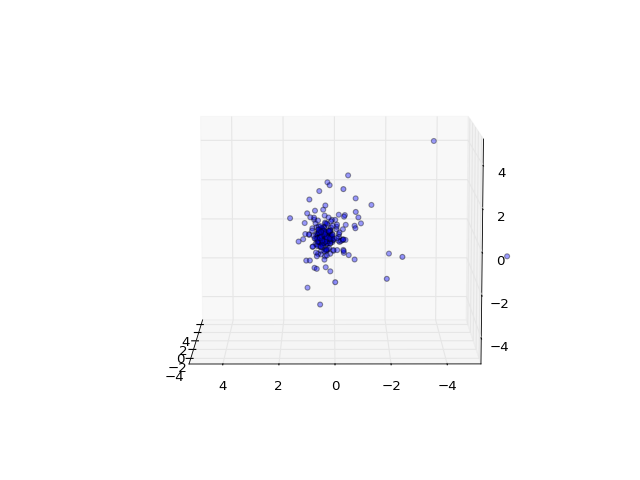

[(-5, 5), (-5, 5), (-5, 5)]

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_stim_low_dim[0][:,0],
           mean_stim_low_dim[0][:,1],
           mean_stim_low_dim[0][:,2])
axislims = (-5,5)
ax.set(xlim=axislims,ylim=axislims,zlim=axislims)

In [16]:
print("Eigen values:")
for ep in mean_stim_low_dim[2]:
    print(ep[0])

Eigen values:
128.241211254
100.381927983
56.593430849
42.033973139
36.0618451492
25.8499611471
23.2381870999
21.0238267198
17.2299592157
15.7561996426
15.1254044555
13.7425672729
12.6475540887
11.7048868937
10.9632532248
10.0294463687
8.99568948478
8.67372013971
8.02214991664
7.02643944784
6.75988970144
6.15054905557
5.72200563212
5.46700216337
4.84059886213
4.58646105253
4.46897831499
4.1244028329
3.73641790684
3.59055396946
3.40978024729
3.34848951674
3.19070859551
2.89043749234
2.80847204708
2.70481646719
2.50365444821
2.47910029948
2.28614962515
2.16508121641
2.11126699441
2.02137569355
1.89820949323
1.84246440435
1.72207119538
1.70739055958
1.65389953219
1.59260055992
1.46003775712
1.43832225787
1.33916991709
1.31556390601
1.28194401087
1.25931224665
1.22073711224
1.20340122786
1.10321650437
1.06720229287
1.02665839207
0.985395073689
0.944842804849
0.922237502745
0.872596933996
0.83810669309
0.819521651713
0.785304814998
0.756795365285
0.718424796152
0.693676059914
0.665472008144

### Looking at something else

In [4]:
mean_sweep_response.shape

(5950, 244)

In [5]:
stim_table_ns.shape

(5950, 3)

In [6]:
X = mean_sweep_response[ [str(i) for i in range(243)] ].values

In [7]:
print(X.shape)
print(type(X))

(5950, 243)
<type 'numpy.ndarray'>


In [19]:
Y, co_mat, eig_pairs = pca.pca(X.T)

In [20]:
Y.shape

(243, 3)

<IPython.core.display.Javascript object>


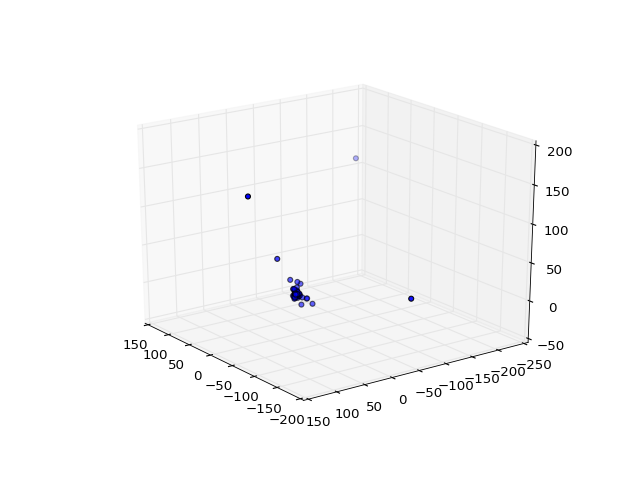

/Users/sekunder/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/sekunder/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:,0],Y[:,1],Y[:,2])